<div style="background-color: #FDF1F1; padding: 30px; border-radius: 20px; border: 2px solid #B03A5B; box-shadow: 5px 5px 15px #888888; text-align: center;">
  <h1 style="color: #B03A5B; font-family: 'Arial', sans-serif; font-size: 28px; font-weight: bold;">
    New York City Taxi Trip Duration
  </h1>
  <p style="color: #B03A5B; font-size: 16px; font-style: italic;">
    (some analysis and geting informations)
  </p>
  <h2 style="color: #B03A5B; font-family: 'Arial', sans-serif; font-size: 28px; font-weight: bold;">
    About The Data🚕
  </h2>
</div>


# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Trip ID: </span>
   - A unique identifier for each trip record.
   - This ID helps distinguish each trip from others and is essential for tracking and referencing individual trips in the dataset.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Vendor ID: </span>
   - A code indicating the provider associated with the trip.
   - This is useful for analyzing the performance and data associated with specific vendors, such as comparing trip durations and distances for different providers.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Pickup Datetime: </span>
   - The date and time when the meter was engaged at the start of the trip.
   - This field can help analyze trends over time, such as peak hours and days for trips, and identify seasonal variations in travel patterns.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Dropoff Datetime: </span>
   - The date and time when the meter was disengaged at the end of the trip.
   - This, in combination with pickup datetime, allows for calculating the trip duration and identifying patterns in travel time.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Passenger Count: </span>
   - The number of passengers in the vehicle, entered by the driver.
   - This field can be useful in analyzing how passenger count affects trip duration or trip cost and can also help identify correlations with other factors such as location or time of day.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Pickup Longitude: </span>
   - The longitude coordinate where the meter was engaged, marking the pickup location.
   - Analyzing pickup longitude data can provide insights into popular pickup areas and regions with high trip frequencies.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Pickup Latitude: </span>
   - The latitude coordinate where the meter was engaged, marking the pickup location.
   - This field, along with the pickup longitude, can be used to map pickup locations and study patterns based on geography.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Dropoff Longitude: </span>
   - The longitude coordinate where the meter was disengaged, marking the dropoff location.
   - Similar to pickup longitude, this field helps identify high-traffic dropoff areas and potential trip routes.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Dropoff Latitude: </span>
   - The latitude coordinate where the meter was disengaged, marking the dropoff location.
   - Analyzing dropoff locations can help identify travel trends, such as the most common destinations or the proximity to key locations (e.g., airports, train stations).

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Store and Forward Flag: </span>
   - Indicates whether the trip record was temporarily stored in the vehicle's memory before being sent to the vendor due to a lack of server connection.
   - A 'Y' value indicates that the trip data was stored before being sent, while an 'N' value suggests the data was sent immediately. This field can help identify trips that might have been delayed in reporting.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Trip Duration: </span>
   - The duration of the trip, measured in seconds.
   - This field is crucial for understanding trip lengths, and it can be analyzed alongside other variables like time of day, location, and passenger count to uncover patterns in travel times.

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">✔ These fields, when analyzed together, provide valuable insights into trip patterns, vendor performance, and factors influencing trip duration and frequency. </span>


<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">import the needed libraries😉</h1>
</div>

In [1]:
# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import folium
from folium.plugins import MarkerCluster

# 3. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 4. My colors
colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">first we load the data and get some info✌️</h1>
</div>

In [2]:
df_train = pd.read_csv(r"D:\Ai courses\ML mostafa saad\projects\taxi duration\New folder\The Notebook\train.csv")
df_val = pd.read_csv(r"D:\Ai courses\ML mostafa saad\projects\taxi duration\New folder\The Notebook\val.csv")

In [3]:
# GET NUM OF COLOMS AND ROWS
print(f"Number of column of the train data :{df_train.shape[1]}\nNumber of rows of train data :{df_train.shape[0]}")
print("_"* 60)
print(f"\nNumber of column of the validation data :{df_val.shape[1]}\nNumber of rows of validation data :{df_val.shape[0]}")

Number of column of the train data :10
Number of rows of train data :1000000
____________________________________________________________

Number of column of the validation data :10
Number of rows of validation data :229319


In [4]:
# Concatenate vertically
df = pd.concat([df_train, df_val], ignore_index=True)

# combine them in csv file
df.to_csv('combined.csv', index=False)

# print head
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [5]:
# GET NUM OF COLOMS AND ROWS
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :10
Number of rows :1229319


In [6]:
# GET THE INFO 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1229319 non-null  object 
 1   vendor_id           1229319 non-null  int64  
 2   pickup_datetime     1229319 non-null  object 
 3   passenger_count     1229319 non-null  int64  
 4   pickup_longitude    1229319 non-null  float64
 5   pickup_latitude     1229319 non-null  float64
 6   dropoff_longitude   1229319 non-null  float64
 7   dropoff_latitude    1229319 non-null  float64
 8   store_and_fwd_flag  1229319 non-null  object 
 9   trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 93.8+ MB


In [7]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
             })

,count,nulls,nulls%,cardinality
id,1229319,0,0.0,1229319
vendor_id,1229319,0,0.0,2
pickup_datetime,1229319,0,0.0,1173138
passenger_count,1229319,0,0.0,9
pickup_longitude,1229319,0,0.0,22208
pickup_latitude,1229319,0,0.0,43809
dropoff_longitude,1229319,0,0.0,32222
dropoff_latitude,1229319,0,0.0,60233
store_and_fwd_flag,1229319,0,0.0,2
trip_duration,1229319,0,0.0,7147


In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06
mean,1.534912e+00,1.664531e+00,-7.397345e+01,4.075093e+01,-7.397340e+01,4.075182e+01,9.596917e+02
std,4.987798e-01,1.314509e+00,6.178003e-02,3.354454e-02,6.164072e-02,3.634104e-02,5.263573e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399185e+01,4.073737e+01,-7.399133e+01,4.073590e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398173e+01,4.075411e+01,-7.397976e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396735e+01,4.076836e+01,-7.396303e+01,4.076982e+01,1.075000e+03
max,2.000000e+00,8.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Drop The unimportant columns😉</h1>
</div>

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Why We Remove the "ID" Column</span>

The **"ID"** column is often used as a unique identifier for each record in a dataset. While it serves as a crucial reference for distinguishing between individual records, it generally doesn't provide any analytical value for certain tasks like modeling or data analysis. Here’s why we typically drop it:

1. **<span style="color:rgb(235, 116, 116);">No Predictive Value:</span>**
   - The "ID" column doesn't contain any information that can help with predictive modeling. It is simply a unique label for each entry, and thus, it does not contribute to the model’s ability to understand patterns or make predictions.

2. **<span style="color:rgb(235, 116, 116);">Redundant for Analysis:</span>**
   - Since the "ID" does not influence any of the outcomes or behaviors of the data, keeping it can make it harder to spot useful trends and patterns in the dataset.

3. **<span style="color:rgb(235, 116, 116);">Prevents Data Leakage:</span>**
   - If the "ID" is used in the model, it can cause **data leakage**. The model might incorrectly learn correlations between the target variable and the "ID" values, leading to poor generalization and overfitting.

4. **<span style="color:rgb(235, 116, 116);">Focus on Relevant Features:</span>**
   - Dropping the "ID" column helps the analysis or model focus only on the features that contain useful information, improving both interpretability and performance.

Thus, by removing the "ID" column, we ensure that our analysis or model works with relevant data and avoids unnecessary complexity.




In [9]:
df = df.drop(["id"],axis=1)

df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Feature Engineering✌️</h1>
</div>

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Why We Apply np.log1p to "trip_duration"</span>

The **`np.log1p()`** function is applied to the **`trip_duration`** column to perform a **log transformation**. Here's why this transformation is useful:

1. **<span style="color:rgb(235, 116, 116);">Handles Skewed Data:</span>**
   - The **trip duration** data is likely to be right-skewed, with some very long trips that can disproportionately influence statistical analyses. By applying a logarithmic transformation, we reduce the impact of extreme values and make the distribution more normal-like.

2. **<span style="color:rgb(235, 116, 116);">Stabilizes Variance:</span>**
   - Log transformations help stabilize the variance in the dataset. For example, if shorter trips tend to have smaller variations compared to longer trips, applying `log1p` can help equalize this difference.

3. **<span style="color:rgb(235, 116, 116);">Improves Model Performance:</span>**
   - Many machine learning models, particularly linear models, perform better when data is normally distributed. The log transformation improves model accuracy by reducing skew and making the relationships between variables more linear.

4. **<span style="color:rgb(235, 116, 116);">What Does `np.log1p()` Do?</span>**
   - `np.log1p()` is equivalent to applying **`log(x + 1)`**. It is useful when there are zero values in the dataset, as **log(0)** is undefined. This ensures that the transformation is safely applied even to zero or small values.




In [10]:
df["trip_duration"] = np.log1p(df.trip_duration)

df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,6.947937
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,6.719013
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,6.421622
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,6.766192
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,8.510773


In [11]:
def process_pickup_datetime(df):
    # Convert 'pickup_datetime' to datetime
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
    # Split into separate date and time columns
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_time'] = df['pickup_datetime'].dt.time
    
    # Convert 'pickup_date' to datetime format and then format it as MM/DD/YYYY
    df['pickup_date'] = pd.to_datetime(df['pickup_date']).dt.strftime('%m/%d/%Y')
    
    # Convert 'pickup_date' back to datetime to maintain consistency
    df['pickup_date'] = pd.to_datetime(df['pickup_date'])
    
    # Extract the month names
    df['month'] = df['pickup_date'].dt.month_name()
    
    return df

# Usage
df = process_pickup_datetime(df)

In [12]:
def haversine_distance(lat1, lon1, lat2, lon2):
    
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Earth's radius in kilometers
    return c * r

# Calculate distance 
df['distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Let's do some visualization 📈</h1>
</div>

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">1. Univariate Analysis</span>

In [13]:
vendor_id_sum = df['vendor_id'].value_counts()
store_and_fwd_flag_sum = df['store_and_fwd_flag'].value_counts()

col = {
    "Vendor ID Distribution": vendor_id_sum,
    "Store and Forward Flag Distribution": store_and_fwd_flag_sum
}

for title, data in col.items():
    fig = px.pie(
        values=data.values,
        names=data.index,
        color_discrete_sequence=colors[3:],
        title=title,
        template="plotly_dark"
    )
    fig.update_traces(textinfo='label+percent')
    fig.show()

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Vendor ID and Store and Forward Flag Distribution</span>

The distributions of **Vendor ID** and **Store and Forward Flag** provide insights into the dataset's characteristics. Here's a breakdown of the distributions:

1. **<span style="color:rgb(235, 116, 116);">Vendor ID Distribution:</span>**
   - **Vendor 1:** 46.5%
   - **Vendor 2:** 53.5%
   - The data is slightly skewed towards **Vendor 2**, which accounts for a majority of the entries.

2. **<span style="color:rgb(235, 116, 116);">Store and Forward Flag Distribution:</span>**
   - **Y (Yes):** 0.552%
   - **N (No):** 99.4%
   - The **Store and Forward Flag** is predominantly **N (No)**, indicating that the majority of the data points do not use the store and forward mechanism.

### <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Implications:</span>
- The **Vendor ID** distribution suggests a relatively balanced representation between the two vendors, with a slight preference for Vendor 2.
- The **Store and Forward Flag** distribution indicates that the store and forward mechanism is rarely used in this dataset, which could be relevant for understanding the data collection process and its impact on analysis.

In [14]:
pickup_date_counts = df['pickup_date'].value_counts().reset_index()
pickup_date_counts.columns = ['pickup_date', 'Frequency']

fig = px.histogram(pickup_date_counts, x="pickup_date", y="Frequency", title="histogram of Pickup Dates",color_discrete_sequence=[colors[5]])

fig.update_layout(
    xaxis_title="pickup_date",
    template="plotly_dark",  # Use the Plotly Dark template
    yaxis_title="Frequency",
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
)
fig.show()

In [15]:
# Get value counts
month_counts = df['month'].value_counts()
pass_count = df["passenger_count"].value_counts().sort_index()
viss = [
    {"data": month_counts, "title": "Monthly Pickup Frequencies", "x_label": "Month", "y_label": "Frequency"},
    {"data": pass_count, "title": "Passenger Count Frequencies", "x_label": "Passenger Count", "y_label": "Frequency"}
]

for vis in viss:
    data = vis["data"]
    fig = px.line(
        x=data.index,
        y=data.values,
        title=vis["title"],
        labels={'x': vis["x_label"], 'y': vis["y_label"]},
        color_discrete_sequence=[colors[5]],
        markers=True,
        template='plotly_dark'
    )

    fig.show()

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Monthly Pickup and Passenger Count Frequencies</span>

The data provides insights into the **Monthly Pickup Frequencies** and **Passenger Count Frequencies**. Here's a breakdown of the distributions:

1. **<span style="color:rgb(235, 116, 116);">Monthly Pickup Frequencies:</span>**
   - The months are listed in descending order of pickup frequency: **March, April, May, February, June, January**.
   - **March** has the highest pickup frequency, while **January** has the lowest.

2. **<span style="color:rgb(235, 116, 116);">Passenger Count Frequencies:</span>**
   - The passenger counts are distributed across different ranges, with the highest frequency observed for **1M** passengers.
   - The frequencies decrease as the passenger count increases, with the lowest frequency observed for **8** passengers.

### <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Implications:</span>
- The **Monthly Pickup Frequencies** indicate seasonal variations in pickup activities, with higher activities in the spring months (March, April, May) and lower activities in the winter months (January, February).
- The **Passenger Count Frequencies** suggest that most trips involve a smaller number of passengers, with a significant drop in frequency as the passenger count increases.

In [17]:
fig = px.histogram(
    df,
    x='distance_km',
    title='distance_km distribution in top hits',
    color_discrete_sequence=[colors[1]],
    template='plotly_dark'
)
fig.show()


### <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">2. Bivariative Analysis  </span>

In [18]:
distance_for_each_vendor = df['distance_km'].groupby(df['vendor_id']).aggregate(sum)

distance_for_each_vendor_km = distance_for_each_vendor.apply(lambda x: f"{x / 1e6:.2f} M km")

fig = px.pie(
        values=distance_for_each_vendor.values,
        names=distance_for_each_vendor.index,
        color_discrete_sequence=colors[3:],
        title="distribution of the total distance for each vendors",
        template="plotly_dark"
    )
fig.update_traces(textinfo='label+percent')
fig.show()

In [19]:
sampled_df = df.sample(n=100000, random_state=42)

# Use sampled_df for visualization

In [20]:
from folium.plugins import MarkerCluster

# Create a map
map_ = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=12)

# Add points with clustering
marker_cluster = MarkerCluster().add_to(map_)
for lat, lon in zip(sampled_df['pickup_latitude'], sampled_df['pickup_longitude']):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

# Display the map 
map_


In [21]:
distance_by_month_vendor = df.groupby(['vendor_id', 'month'])['distance_km'].sum().reset_index()

In [22]:
# Create the line chart
fig = px.line(
    distance_by_month_vendor,
    x='month',  # X-axis: Months
    y='distance_km',  # Y-axis: Total distance
    color='vendor_id',  # Line color by vendor_id
    title="Monthly Distance by Vendor",
    labels={'month': 'Month', 'distance_km': 'Distance (km)', 'vendor_id': 'Vendor ID'},
    markers=True,
    color_discrete_sequence=colors[7:],
    template='plotly_dark'
)

# Show the figure
fig.show()

In [23]:
#Let's make a subplot to the bmi column 
fig = make_subplots(rows=1, cols=2, subplot_titles=["trip duration Distribution (Box Plot)", "trip duration Distribution (Histogram)"])

fig.add_trace(
    go.Box(y=df['trip_duration'], name="Box Plot", marker_color=colors[1]),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['trip_duration'], nbinsx=20, name="Histogram", marker_color=colors[5]),
    row=1, col=2
)

fig.update_layout(
    title="trip duration Distribution: Box Plot and Histogram",
    template="plotly_dark",
    showlegend=False
)

fig.update_xaxes(title_text="trip duration (Histogram)", row=1, col=2)
fig.update_yaxes(title_text="Count (Histogram)", row=1, col=2)
fig.update_yaxes(title_text="trip duration (Box Plot)", row=1, col=1)

fig.show()

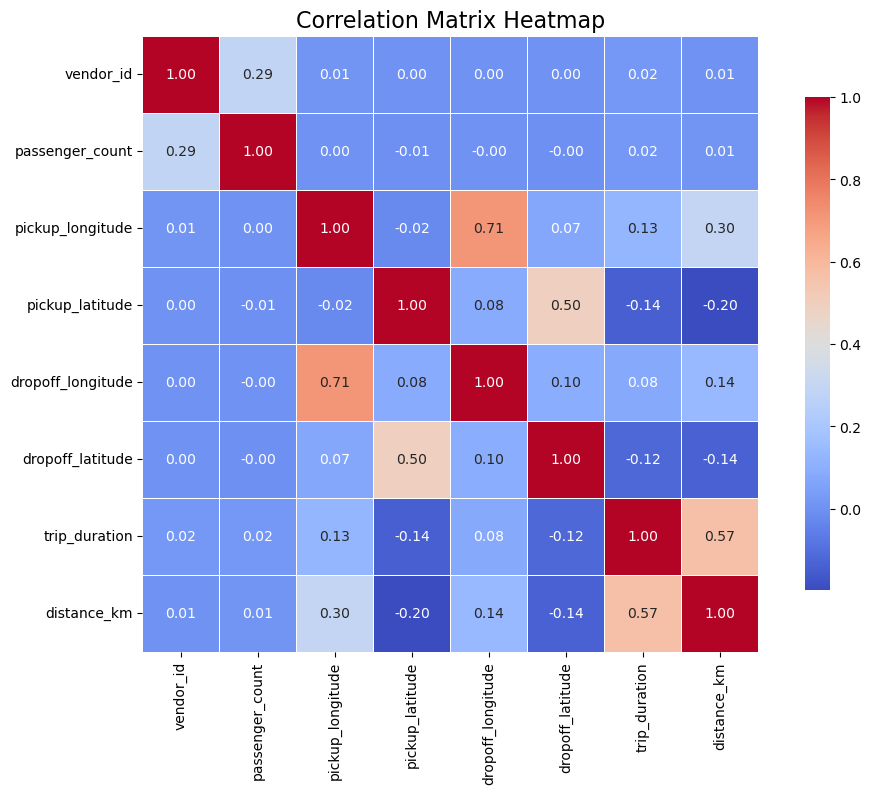

In [24]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, fmt=".2f", 
    cmap="coolwarm", linewidths=0.5, 
    square=True, cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Correlation Matrix Heatmap Analysis</span>

The correlation matrix heatmap provides insights into the relationships between different variables in the dataset. Here's a breakdown of the key correlations:

1. **<span style="color:rgb(235, 116, 116);">Vendor ID:</span>**
   - **Vendor ID** shows a moderate positive correlation with **passenger_count** (0.29).
   - It has very weak correlations with other variables, indicating that **Vendor ID** does not significantly influence other features.

2. **<span style="color:rgb(235, 116, 116);">Passenger Count:</span>**
   - **Passenger Count** has a moderate positive correlation with **Vendor ID** (0.29).
   - It shows very weak correlations with other variables, suggesting that the number of passengers does not strongly affect other features.

3. **<span style="color:rgb(235, 116, 116);">Pickup and Dropoff Coordinates:</span>**
   - **Pickup Longitude** and **Dropoff Longitude** have a strong positive correlation (0.78).
   - **Pickup Latitude** and **Dropoff Latitude** also show a moderate positive correlation (0.49).
   - These correlations indicate that the pickup and dropoff locations are somewhat related, which is expected in trip data.

4. **<span style="color:rgb(235, 116, 116);">Trip Duration and Distance:</span>**
   - **Trip Duration** has a moderate positive correlation with **Distance_km** (0.57).
   - This suggests that longer trips tend to cover greater distances, which is a logical relationship.

### <span style="color:rgb(102, 133, 190); font-size: 24px; font-weight: bold;">Implications:</span>
- The strong correlation between **Pickup Longitude** and **Dropoff Longitude** indicates that trips often start and end in similar longitudinal regions.
- The moderate correlation between **Trip Duration** and **Distance_km** highlights that distance is a significant factor in determining trip duration.
- The weak correlations involving **Vendor ID** and **Passenger Count** suggest that these variables may not be primary drivers of other features in the dataset.



<div style="background-color:#4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: #ECF0F1; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">
    Thank you 😍
  </h1>
</div>
